In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [3]:
df.tail()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age
18236,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m,213.25,25.282192
18237,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m,213.25,26.101370
18238,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,213.25,28.523288
18239,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,213.25,22.263014
18240,1000,00:03:33.250000,Bethwell Birgen,KEN,1988-08-06,7.0,Lausanne,2012-08-23,Men,1500 m,213.25,24.063014


In [4]:
#Add a column with only year
df['Year'] = df['Date'].dt.year

# List all unique events in the df
unique_events = df['Event'].unique()

# Set the style for the plots
sns.set(style="whitegrid")

# Filter and sort the events based on Olympic distances and half marathon
sorted_events = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']


In [6]:
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age,Year
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,100.91,23.742466,2012
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,101.01,21.712329,2010
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,101.09,21.693151,2010
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,101.11,26.717808,1997
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,101.24,26.687671,1997


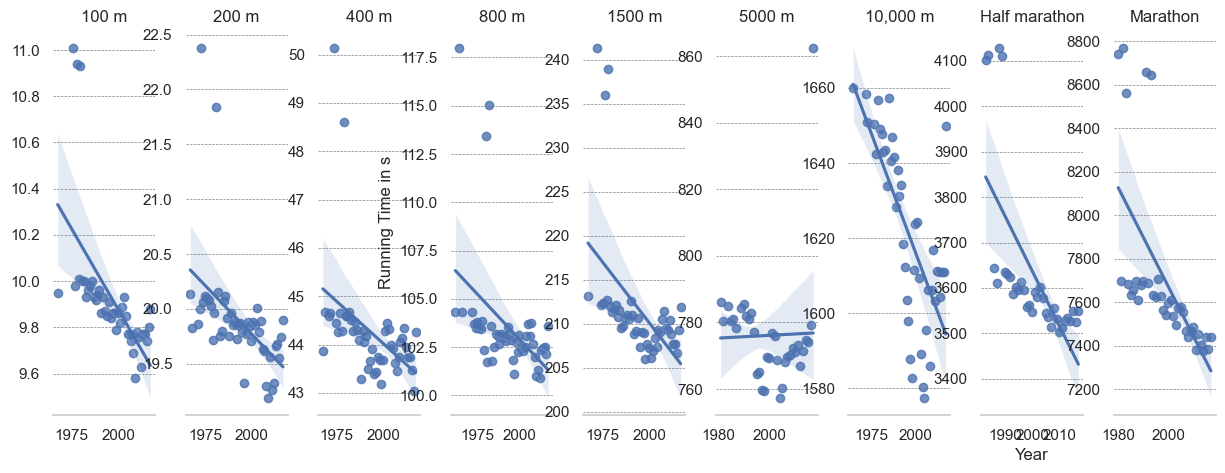

In [8]:
# Determine the number of rows and columns for the subplots
n = len(sorted_events)
ncols = 9  # Number of columns
nrows = 1  # Number of rows

# Create a figure and axes objects
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
min_time_per_event_list = []

for idx, event in enumerate(sorted_events):
    min_time_per_event = df[df['Event'] == event].groupby('Year')['Time_s'].min().reset_index()

    x = min_time_per_event['Year']
    y = min_time_per_event['Time_s']

    #Calculate m slope for regression line
    m, b = np.polyfit(x, y, 1)

    #Creat the regression plot
    ax = axes[idx]

    sns.regplot(data=min_time_per_event, x=x, y=y, ax=ax)
    ax.set_title(f'{event}')

    if idx in [7]:
        ax.set_xlabel('Year')
    else:
        ax.set_xlabel('')

    if idx in [3]:
        ax.set_ylabel('Running Time in s')
    else:
        ax.set_ylabel('')

    # Remove spines
    sns.despine(left=True, top=True, right=True, ax=ax)
    ax.yaxis.set_ticks_position('none')

    # Remove horizontal grid lines
    ax.xaxis.grid(False)

    # Remove the legend title
    if ax.get_legend() is not None:
        ax.get_legend().set_title('')

    # Add subtle vertical grid
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Remove extra subplots if any
for idx in range(len(sorted_events), len(axes)):
    fig.delaxes(axes[idx])

plt.show()


In [9]:
min_time_per_event_list

[]